In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


def show_cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.xlabel('Predicted')
    plt.ylabel('Truth')

    plt.show()

In [55]:
df = pd.read_csv('features.csv')
df

,file,stft_mean,stft_var,rms_mean,rms_var,cent_mean,cent_var,spec_bw_mean,spec_bw_var,rolloff_mean,...,mfcc_15_var,mfcc_16_mean,mfcc_16_var,mfcc_17_mean,mfcc_17_var,mfcc_18_mean,mfcc_18_var,mfcc_19_mean,mfcc_19_var,genre
0,disco.00027.wav,0.485420,0.086618,0.115591,0.003479,2908.674645,1.491064e+06,2990.137959,268580.473350,6348.173137,...,3159.066406,3.712976,3159.066406,3.712976,3159.066406,3.712976,3159.066406,3.712976,3159.066406,disco
1,disco.00007.wav,0.431583,0.082817,0.159575,0.004898,3099.082006,5.448861e+05,2728.233138,129195.868228,6098.201460,...,843.201355,4.460785,843.201355,4.460785,843.201355,4.460785,843.201355,4.460785,843.201355,disco
2,disco.00081.wav,0.358493,0.094490,0.078700,0.002305,2292.779427,6.149959e+05,2208.685660,158492.074918,4741.368184,...,4936.701172,-6.907055,4936.701172,-6.907055,4936.701172,-6.907055,4936.701172,-6.907055,4936.701172,disco
3,disco.00008.wav,0.454291,0.086805,0.190488,0.005629,2801.719944,3.087240e+05,2423.642443,98312.636322,5445.952622,...,808.352844,4.584435,808.352844,4.584435,808.352844,4.584435,808.352844,4.584435,808.352844,disco
4,disco.00015.wav,0.414766,0.079503,0.215861,0.002116,2362.411632,6.915820e+05,2806.845504,318452.928611,5439.756743,...,1387.937744,5.624153,1387.937744,5.624153,1387.937744,5.624153,1387.937744,5.624153,1387.937744,disco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,reggae.00061.wav,0.395590,0.093235,0.180927,0.002940,3123.715746,1.222962e+06,2918.349404,305390.025179,6474.557885,...,1260.986206,2.660639,1260.986206,2.660639,1260.986206,2.660639,1260.986206,2.660639,1260.986206,reggae
995,reggae.00018.wav,0.394744,0.090559,0.106377,0.002688,1907.605694,7.534378e+05,2124.622527,253487.716334,4220.649369,...,4054.975830,0.504649,4054.975830,0.504649,4054.975830,0.504649,4054.975830,0.504649,4054.975830,reggae
996,reggae.00029.wav,0.428849,0.088740,0.103822,0.001832,1585.361927,2.947870e+05,2127.104658,133756.746914,3735.860859,...,5076.282227,2.046883,5076.282227,2.046883,5076.282227,2.046883,5076.282227,2.046883,5076.282227,reggae
997,reggae.00002.wav,0.378393,0.092237,0.092448,0.001836,1796.894892,4.271870e+05,2103.058676,152597.385565,3925.263117,...,4695.547852,-1.850852,4695.547852,-1.850852,4695.547852,-1.850852,4695.547852,-1.850852,4695.547852,reggae


In [56]:
df.drop(columns=['file'], inplace=True)

In [57]:
labels = df.pop('genre')
labels

0       disco
1       disco
2       disco
3       disco
4       disco
        ...  
994    reggae
995    reggae
996    reggae
997    reggae
998    reggae
Name: genre, Length: 999, dtype: object

In [58]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_features, columns=df.columns)
df_scaled

,stft_mean,stft_var,rms_mean,rms_var,cent_mean,cent_var,spec_bw_mean,spec_bw_var,rolloff_mean,rolloff_var,...,mfcc_15_mean,mfcc_15_var,mfcc_16_mean,mfcc_16_var,mfcc_17_mean,mfcc_17_var,mfcc_18_mean,mfcc_18_var,mfcc_19_mean,mfcc_19_var
0,1.305695,0.034952,-0.232113,0.117735,0.986778,2.548667,1.420179,1.365722,1.127665,1.866063,...,0.537715,-0.208113,0.537715,-0.208113,0.537715,-0.208113,0.537715,-0.208113,0.537715,-0.208113
1,0.646275,-0.456265,0.437992,0.508258,1.252815,0.187368,0.922501,-0.080753,0.968880,-0.095420,...,0.636305,-0.869564,0.636305,-0.869564,0.636305,-0.869564,0.636305,-0.869564,0.636305,-0.869564
2,-0.248969,1.052221,-0.794148,-0.205347,0.126251,0.362336,-0.064756,0.223271,0.107003,0.237288,...,-0.862412,0.299610,-0.862412,0.299610,-0.862412,0.299610,-0.862412,0.299610,-0.862412,0.299610
3,0.924406,0.059096,0.908947,0.709422,0.837342,-0.402002,0.343710,-0.401246,0.554564,-0.470538,...,0.652607,-0.879518,0.652607,-0.879518,0.652607,-0.879518,0.652607,-0.879518,0.652607,-0.879518
4,0.440284,-0.884446,1.295497,-0.257616,0.223541,0.553465,1.071882,1.883278,0.550628,2.322940,...,0.789681,-0.713978,0.789681,-0.713978,0.789681,-0.713978,0.789681,-0.713978,0.789681,-0.713978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0.205415,0.890004,0.763283,-0.030699,1.287233,1.879588,1.283765,1.747717,1.207946,1.797061,...,0.398977,-0.750238,0.398977,-0.750238,0.398977,-0.750238,0.398977,-0.750238,0.398977,-0.750238
995,0.195053,0.544303,-0.372485,-0.100048,-0.411913,0.707834,-0.224495,1.209096,-0.223763,1.254663,...,0.114735,0.047774,0.114735,0.047774,0.114735,0.047774,0.114735,0.047774,0.114735,0.047774
996,0.612783,0.309194,-0.411408,-0.335757,-0.862151,-0.436784,-0.219779,-0.033422,-0.531707,0.275251,...,0.318060,0.339477,0.318060,0.339477,0.318060,0.339477,0.318060,0.339477,0.318060,0.339477
997,-0.005224,0.761078,-0.584700,-0.334675,-0.566597,-0.106364,-0.265471,0.162098,-0.411396,0.504757,...,-0.195811,0.230732,-0.195811,0.230732,-0.195811,0.230732,-0.195811,0.230732,-0.195811,0.230732


In [62]:
le = LabelEncoder()
transformed_labels = le.fit_transform(labels)
transformed_labels

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6,

In [ ]:
one_hot = OneHotEncoder()

labels = one_hot.fit_transform(np.array(labels).reshape(-1, 1))

In [67]:
labels

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 999 stored elements and shape (999, 10)>

In [74]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, transformed_labels, test_size=0.2, random_state=42)

In [75]:
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)
accuracy_score(y_test, rfc.predict(X_test))

0.675

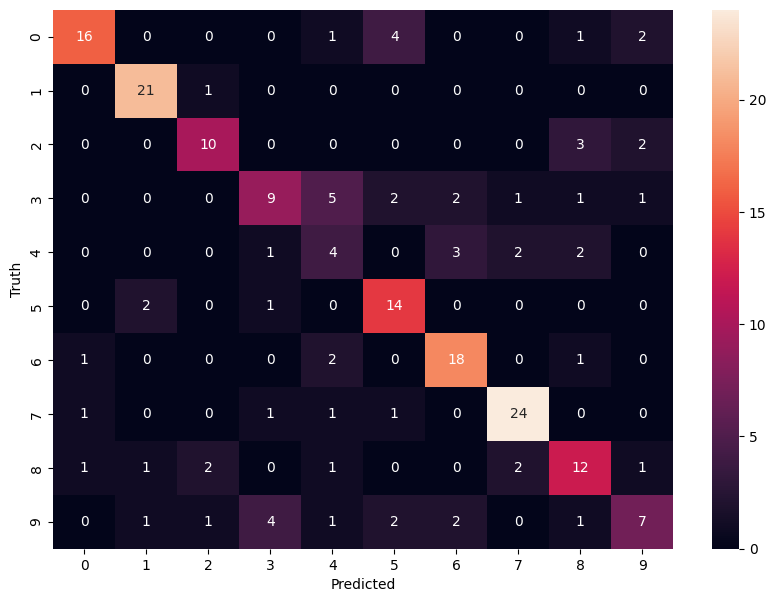

In [81]:
y_pred = rfc.predict(X_test)
show_cm(y_test, y_pred)